In [38]:
import geopandas as gpd
import datetime as dt 
import pandas as pd

departements = [
                'departement-34-herault',
                #'departement-78-yvelines',
                #'departement-01-ain',
                #'departement-25-doubs'
                ]

colonne_prediction = 'fire_prediction_dept'

sd = dt.datetime.strptime('2024-07-31', '%Y-%m-%d').date()
ed = dt.datetime.now().date()
geos = []
for dept in departements:
    d = sd
    while d != ed:
        print(d.strftime('%Y-%m-%d'))
        try:
            geo = gpd.read_file(dept + '/' +'hexagones_'+d.strftime('%Y-%m-%d')+'.geojson')[['scale0', 'id', 'fire_prediction_raw', 'fire_prediction', 'fire_prediction_dept', 'geometry', 'nbfirepoint']]
            geo['departement'] = dept
            geo['date'] = d.strftime('%Y-%m-%d')
            geos.append(geo)
        except Exception as e:
            d += dt.timedelta(days=1)
            continue
        d += dt.timedelta(days=1)

geos = pd.concat(geos)

2024-07-31
2024-08-01
2024-08-02
2024-08-03
2024-08-04
2024-08-05
2024-08-06
2024-08-07
2024-08-08
2024-08-09
2024-08-10
2024-08-11
2024-08-12
2024-08-13
2024-08-14
2024-08-15
2024-08-16
2024-08-17
2024-08-18
2024-08-19
2024-08-20
2024-08-21
2024-08-22
2024-08-23
2024-08-24
2024-08-25


In [39]:
geos.groupby('departement')['nbfirepoint'].mean()

departement
departement-34-herault    0.0
Name: nbfirepoint, dtype: float64

In [40]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['nbfirepoint'] > 0)].date.unique()

array([], dtype=object)

In [41]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['date'] == '2024-08-01')].nbfirepoint.sum()

0

In [42]:
geos.departement.unique()

array(['departement-34-herault'], dtype=object)

In [43]:
len(geos)

1988

In [44]:
geos['nbfirepoint'].unique(), geos['nbfirepoint'].sum()

(array([0]), 0)

In [45]:
import matplotlib.pyplot as plt

In [46]:
geos.date

0      2024-08-06
1      2024-08-06
2      2024-08-06
3      2024-08-06
4      2024-08-06
          ...    
989    2024-08-18
990    2024-08-18
991    2024-08-18
992    2024-08-18
993    2024-08-18
Name: date, Length: 1988, dtype: object

In [47]:
geos[geos['date'] == '2024-08-01'][colonne_prediction]

Series([], Name: fire_prediction_dept, dtype: int64)

ValueError: aspect must be finite and positive 

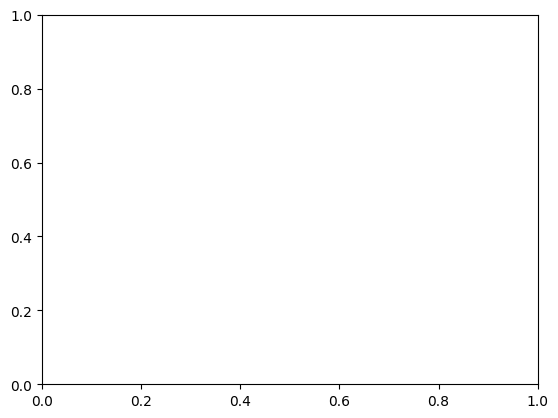

In [48]:
geos[geos['date'] == '2024-08-12'].plot(colonne_prediction, categorical=True, legend=True)
geos[geos['date'] == '2024-08-12'].groupby('id')[colonne_prediction].mean()

In [ ]:
geos['colonne_prediction_raw'].unique()

array([ 2.04128909, -0.01306249,  1.8533994 ,  0.25835755,  1.16681087,
        1.52688372,  1.41160393,  1.93827975,  0.14467582,  2.52659869,
        0.75968242,  0.62637901,  2.52725673,  1.80801964,  1.96534276,
        0.15956558,  2.41252017,  3.12613511,  1.57204759,  2.05373406,
        1.37257755,  1.48188746,  0.33448628,  1.91949868,  2.19649053,
        1.42992556,  1.56501997,  1.26770079,  1.32221949,  0.41833311,
        1.51647031,  1.5086894 ,  2.43186879,  1.09037399,  0.68381166,
        1.39200926,  0.23647788,  1.16999495,  1.1230253 ,  1.35736334,
        0.53400499,  1.24390757,  1.82714403,  0.71387666,  2.49526167,
        2.23220253,  2.0569849 ,  1.97000062,  2.2129941 ,  2.53125167,
        0.47655761,  3.09571385,  2.04661441,  2.07937551,  2.58957911,
        1.28728402,  0.8908506 ,  0.16737555,  0.4561446 ,  0.24245039,
        0.92931747,  0.56709027,  0.58195519,  0.        ,  0.27991614,
        0.30231792,  1.01712644,  2.28986692,  0.06026809,  0.80

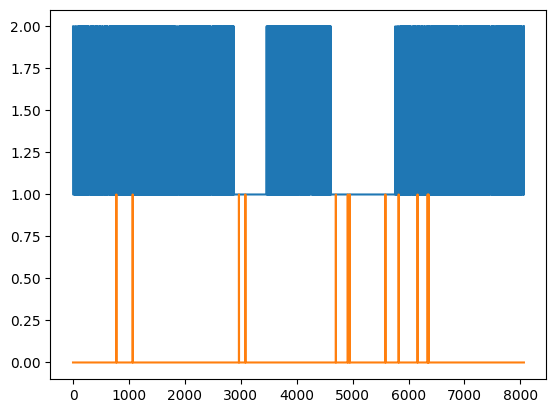

In [ ]:
plt.plot(geos[colonne_prediction].values)
plt.plot(geos['nbfirepoint'].values)

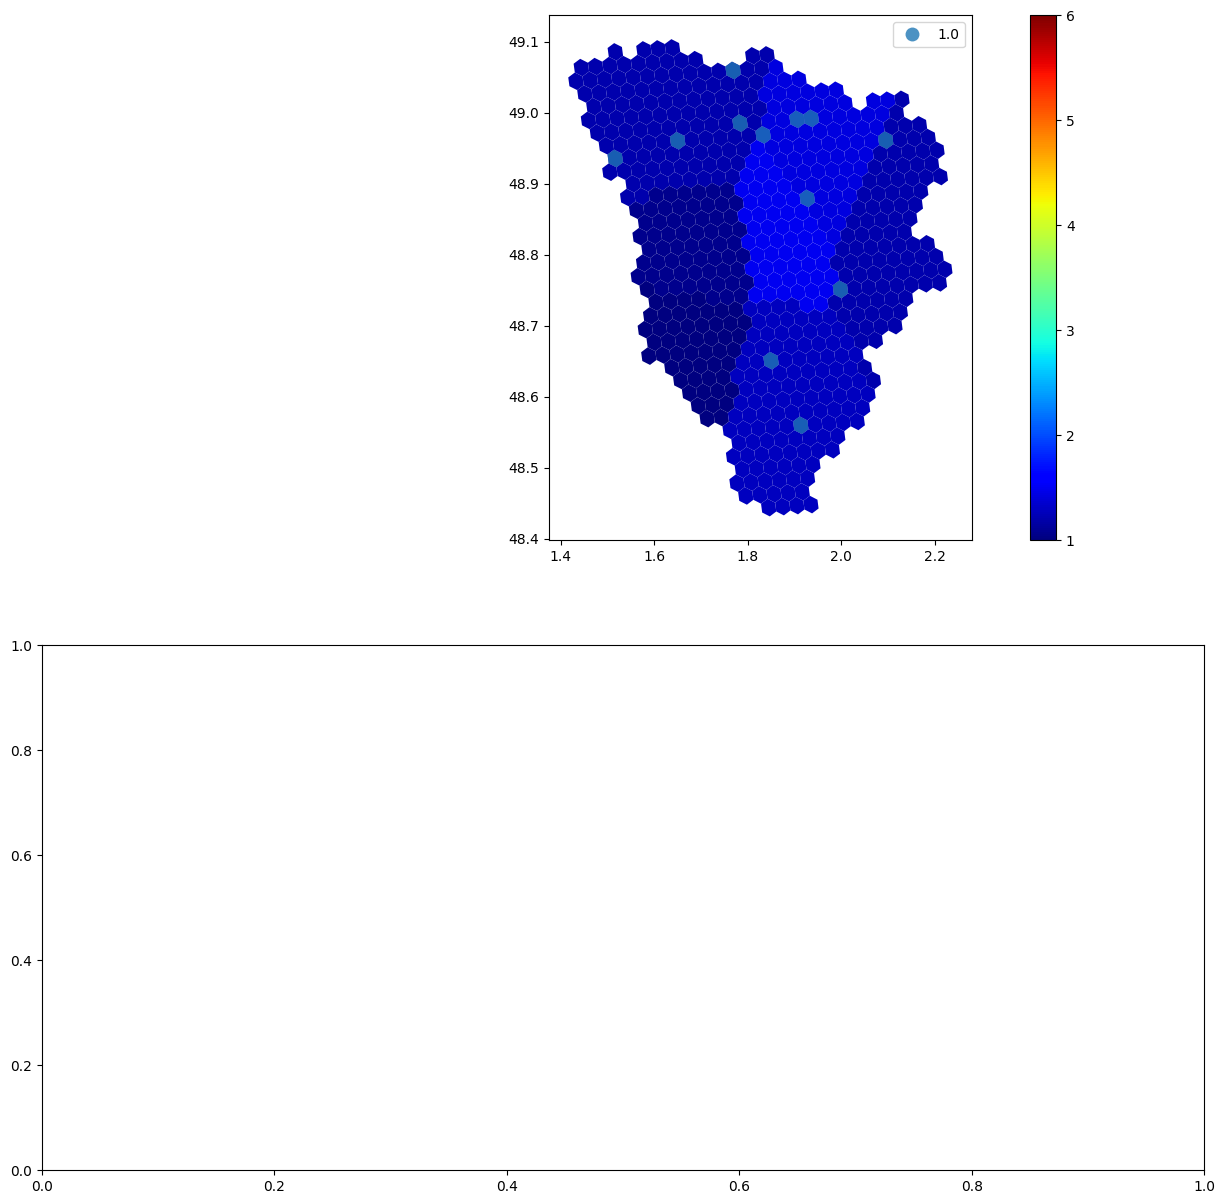

In [ ]:
gb = geos.groupby(['scale0', 'departement'])[[colonne_prediction]].mean().reset_index()
gb2 = geos.groupby(['scale0', 'departement'])[['nbfirepoint']].sum().reset_index()
gb['nbfirepoint'] = gb2['nbfirepoint']
gb = gb.set_index('scale0').join(other=geos[geos['date'] ==  '2024-08-15'][['geometry', 'scale0']].set_index('scale0'), on='scale0').reset_index()
gb = gpd.GeoDataFrame(gb, geometry=gb.geometry)

fig, ax = plt.subplots(len(departements) + 1, figsize=(15,15))

for i, dept in enumerate(departements):
    gb[gb['departement'] == dept].plot(column=colonne_prediction, vmin=1, vmax=6, legend=True, ax=ax[i], cmap='jet')
    if len(gb[(gb['nbfirepoint'] > 0) & (gb['departement'] == dept)]) == 0:
        continue
    gb[(gb['nbfirepoint'] > 0) & (gb['departement'] == dept)].plot(column='nbfirepoint', ax=ax[i], alpha=0.8, legend=True, categorical=True)

['2024-08-06' '2024-08-10' '2024-08-13' '2024-08-14' '2024-08-15'
 '2024-08-16']
date
2024-08-06    2.0
2024-08-10    2.0
2024-08-13    3.0
2024-08-14    1.0
2024-08-15    2.0
2024-08-16    2.0
Name: nbfirepoint, dtype: float64


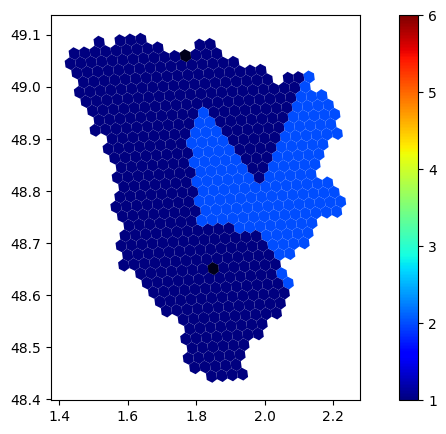

In [ ]:
# Yvelines

if 'departement-78-yvelines' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-78-yvelines') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(10,5))
    geosFYvelines[geosFYvelines['date'] == '2024-08-06'].plot(column=colonne_prediction, ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-06') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, cmap='binary', ax=ax, vmin=0)

In [ ]:
# Ain

if 'departement-01-ain' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-01-ain') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(15,10))
    geosFYvelines[geosFYvelines['date'] == '2024-08-12'].plot(column=colonne_prediction, ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-12') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, cmap='binary', ax=ax, vmin=0)

In [ ]:
# Doubs

if 'departement-25-doubs' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-25-doubs') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(10,5))
    geosFYvelines[geosFYvelines['date'] == '2024-08-13'].plot(column=colonne_prediction, ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-13') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, cmap='binary', ax=ax, vmin=0)

In [ ]:
geosFYvelines[geosFYvelines['date'] == '2024-08-01'][colonne_prediction].unique()

array([], dtype=int64)

In [ ]:
geos.date.values[0]

'2024-08-05'

In [ ]:
gb3 = geos.groupby(by=['id', 'date', 'departement'])[[colonne_prediction, 'colonne_prediction_raw']].mean().reset_index()
gb4 = geos.groupby(by=['id', 'date'])[['nbfirepoint']].sum().reset_index()
gb3['nbfirepoint'] = gb4['nbfirepoint']
gb3.sort_values('date', inplace=True)
gb3

,id,date,departement,fire_prediction,fire_prediction_raw,nbfirepoint
0,23.0,2024-08-05,departement-78-yvelines,1.0,1.526884,0.0
14,24.0,2024-08-05,departement-78-yvelines,2.0,2.041289,0.0
84,29.0,2024-08-05,departement-78-yvelines,1.0,-0.013062,0.0
70,28.0,2024-08-05,departement-78-yvelines,1.0,1.411604,0.0
28,25.0,2024-08-05,departement-78-yvelines,1.0,1.853399,0.0
...,...,...,...,...,...,...
41,25.0,2024-08-18,departement-78-yvelines,2.0,4.588600,0.0
69,27.0,2024-08-18,departement-78-yvelines,1.0,0.498874,0.0
27,24.0,2024-08-18,departement-78-yvelines,2.0,2.854506,0.0
55,26.0,2024-08-18,departement-78-yvelines,1.0,1.843039,0.0


In [ ]:
import numpy as np

if 'departement-01-ain' in geos.departement.unique():
    val = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')[colonne_prediction].values
    valbin = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Ain')

In [ ]:
import numpy as np

if 'departement-25-doubs' in geos.departement.unique():
    val = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')[colonne_prediction].values
    valbin = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Doubs')

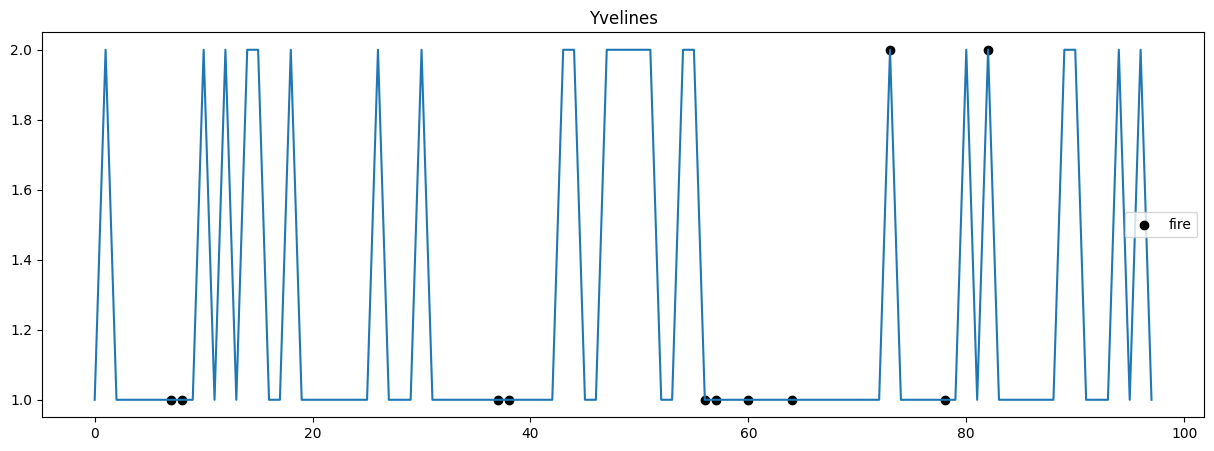

In [ ]:
import numpy as np

if 'departement-78-yvelines' in geos.departement.unique():

    val = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')[colonne_prediction].values
    valbin = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Yvelines')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def my_f1_score(ytrue , ypredNumpy, isBin : bool, weights = None):

    bounds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ytrueRegNumpy = ypredNumpy
    ytrueNumpy = ytrue

    weightsNumpy = np.ones(ypredNumpy.shape[0])
    maxi = np.max(ypredNumpy)

    bestScore = 0.0
    prec = 0.0
    rec = 0.0
    bestBound = 0.0
    for bound in bounds:
        if isBin:
            yBinPred = (ypredNumpy > bound * maxi).astype(int)
        else:
            yBinPred = (ytrueRegNumpy > bound * maxi).astype(int)

        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        if f1 > bestScore:
            bestScore = f1
            bestBound =  bound
            prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
            rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
    
    if not isBin:
        yBinPred = (ypredNumpy > bestBound * maxi).astype(int)
        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        bestScore = f1
        bestBound =  bound
        prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)

    return (bestScore, prec, rec, bestBound, ypredNumpy > bestBound * maxi)

res = my_f1_score((gb3.nbfirepoint > 0).astype(int), gb3.colonne_prediction_raw.values, None)
res

(0.21052631578947367,
 0.12307692307692308,
 0.7272727272727273,
 0.9,
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]))

In [ ]:
def class_risk(ytrue, yclass) -> dict:
    
    res = {}
    uniqueClass = np.unique(yclass)
    for c in uniqueClass:
        classIndex = np.argwhere(yclass == c)
        classBin = ytrue[classIndex] > 0
        meanF = round(np.mean(classBin), 3)
        res[c] = (meanF)
    return res

cr = class_risk(gb3.nbfirepoint.values, gb3.colonne_prediction.values)
cr

{1.0: 0.122, 2.0: 0.083}

(0.0, 1.0)

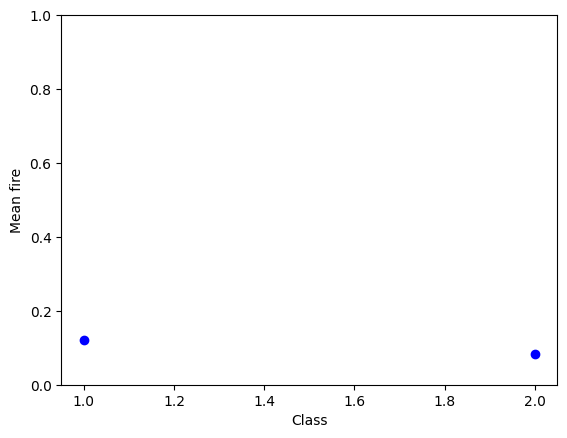

In [ ]:
for key, val in cr.items():
    plt.scatter(key, val, c='blue')

plt.ylabel('Mean fire')
plt.xlabel('Class')
plt.ylim(0, 1)